# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../')
from pathlib import Path
import os


sns.set()

## DB Locations

In [2]:
work_dir=Path(os.getcwd()).parent.parent
data_dir = work_dir.joinpath('data')
covid_db = data_dir.joinpath('covid.db')
tweets_db = data_dir.joinpath('tweet.db')


## SqlAlchemy Connection

In [3]:
from sqlalchemy import create_engine

tweet_engine = create_engine(f'sqlite:///{tweets_db}')
covid_engine = create_engine(f'sqlite:///{covid_db}')


## Read DB into DF

In [4]:
tweet_df = pd.read_sql_table('tweet', tweet_engine)
covid_df = pd.read_sql_table('covid', covid_engine)

### Show Samples

In [5]:
tweet_df.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never once claimed was a hoax. We al...,['COVID19'],Twitter for Android,False
1,3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,The one gift has give me is an appreciation ...,['COVID19'],Twitter for iPhone,False
2,4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel \n,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
3,5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,deaths continue to rise. It's almost as bad...,"['coronavirus', 'covid19']",Twitter Web App,False
4,6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How Will Change Work in General (and recruiti...,"['COVID19', 'Recruiting']",Buffer,False


In [6]:
covid_df.head()

,index,iso_code,continent,location,date,total_cases,new_cases,new_deaths,total_deaths,new_vaccinations,total_vaccinations,total_tests,new_tests,hosp_patients
0,204,AFG,Asia,Afghanistan,2020-07-25,35981.0,66.0,14.0,1225.0,NaN,NaN,NaN,NaN,NaN
1,205,AFG,Asia,Afghanistan,2020-07-26,36036.0,55.0,21.0,1246.0,NaN,NaN,NaN,NaN,NaN
2,206,AFG,Asia,Afghanistan,2020-07-27,36157.0,121.0,13.0,1259.0,NaN,NaN,NaN,NaN,NaN
3,207,AFG,Asia,Afghanistan,2020-07-28,36263.0,106.0,10.0,1269.0,NaN,NaN,NaN,NaN,NaN
4,208,AFG,Asia,Afghanistan,2020-07-29,36368.0,105.0,1.0,1270.0,NaN,NaN,NaN,NaN,NaN


## EDA on Tweet Data

### Trend of Tweets per Date

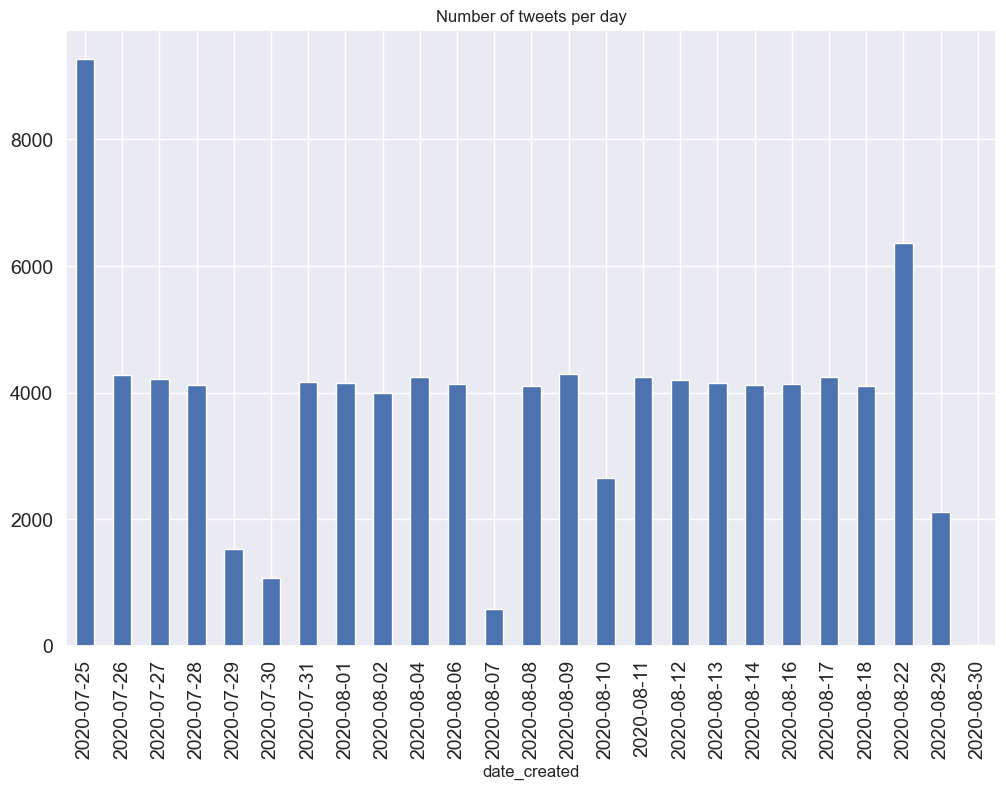

In [7]:
# Line plot: number of tweets per day
tweet_df['date'] = pd.to_datetime(tweet_df['date'])
tweet_df['date_created'] = tweet_df['date'].dt.date
tweet_df.groupby('date_created')['text'].count().plot(kind='bar', figsize=(12,8), title='Number of tweets per day', fontsize=14)
plt.show()

### Tweets Per Hour

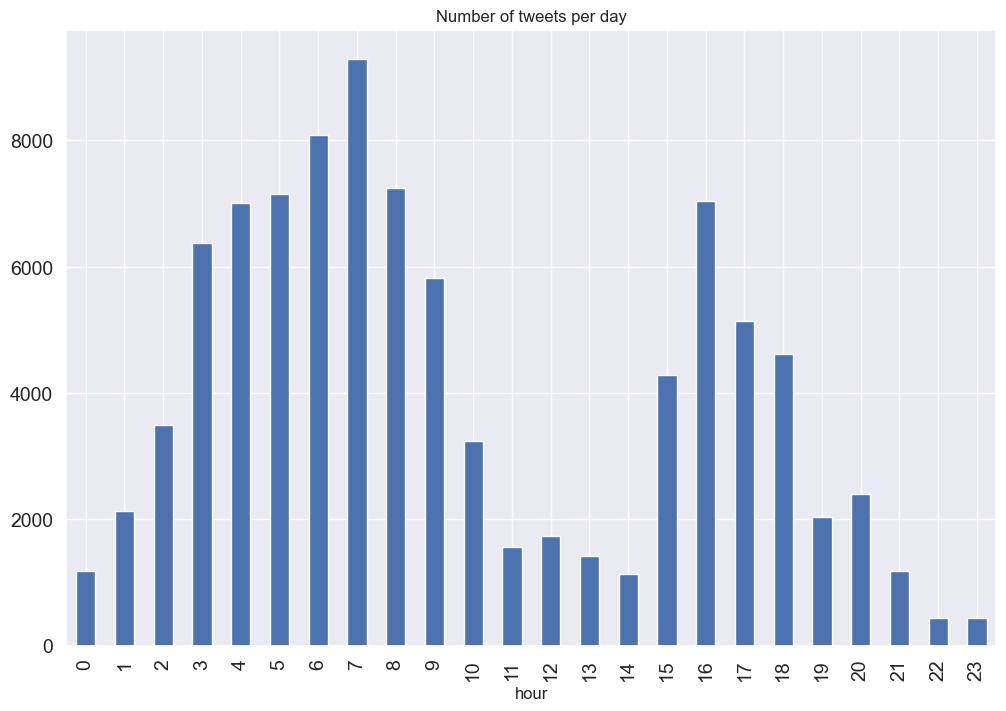

In [8]:
# Line plot: number of tweets per hour
tweet_df['hour'] = tweet_df['date'].dt.hour
tweet_df.groupby('hour')['text'].count().plot(kind='bar', figsize=(12,8), title='Number of tweets per day', fontsize=14)
plt.show()

### Tweets Per Day

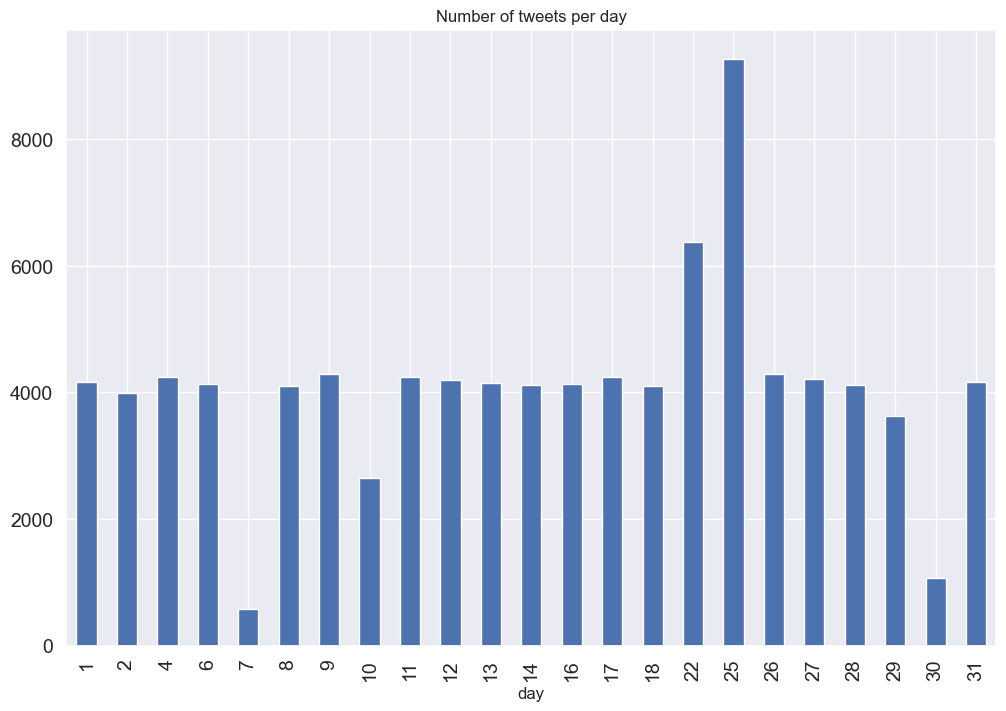

In [9]:
# Line plot: number of tweets per hour
tweet_df['day'] = tweet_df['date'].dt.day
tweet_df.groupby('day')['text'].count().plot(kind='bar', figsize=(12,8), title='Number of tweets per day', fontsize=14)
plt.show()

### Tweet Per Week Day

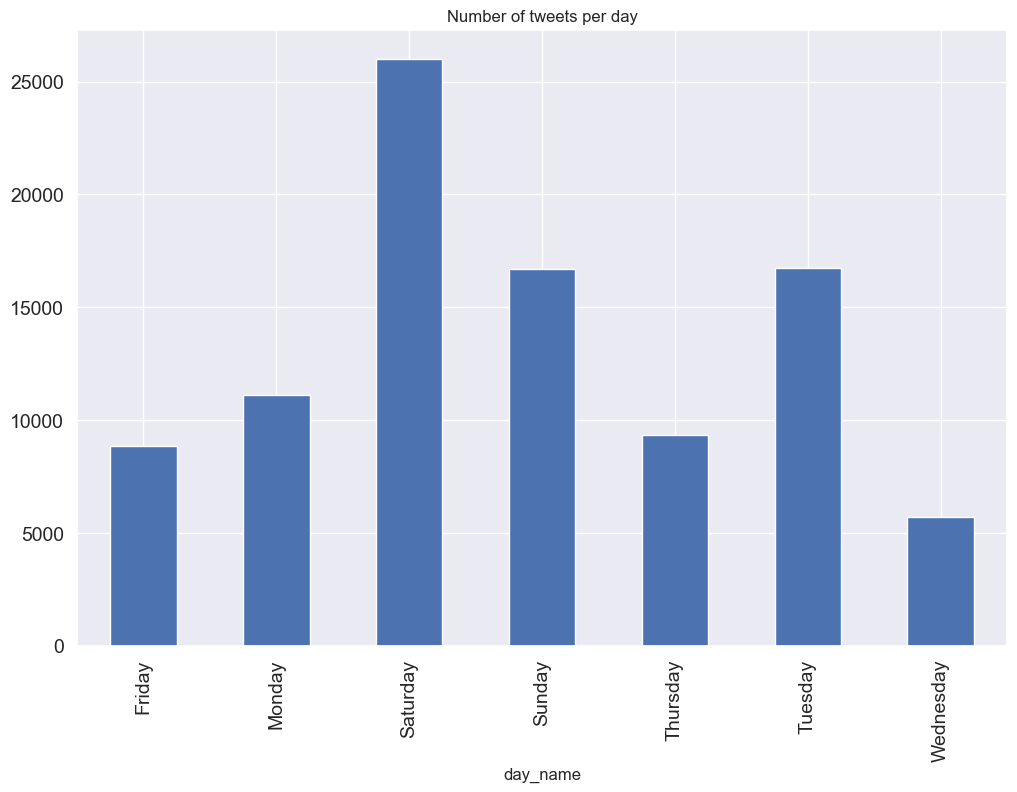

In [10]:
# Line plot: number of tweets per hour
tweet_df['day_name'] = tweet_df['date'].dt.day_name()
tweet_df.groupby('day_name')['text'].count().plot(kind='bar', figsize=(12,8), title='Number of tweets per day', fontsize=14)
plt.show()

### Tweets Per Device

In [11]:
top_5_src = tweet_df.source.value_counts().index[:5]
tweet_df['source'] = tweet_df['source'].apply(lambda x: x if x in top_5_src else 'other')

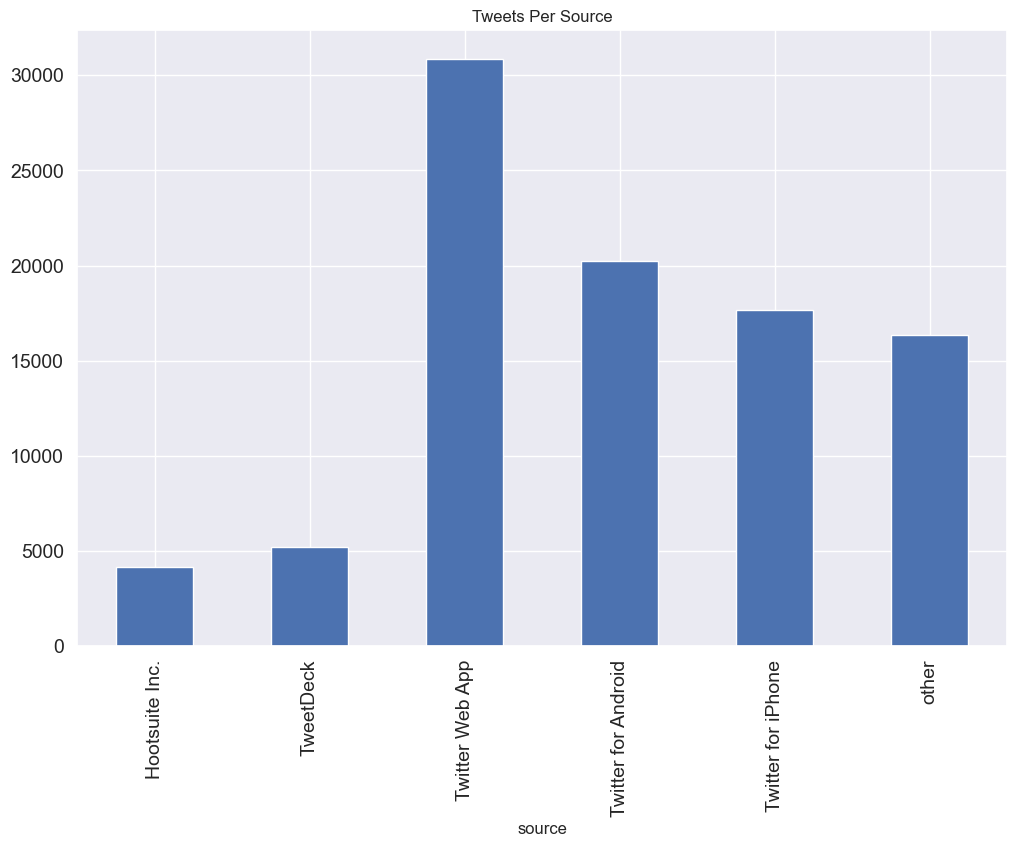

In [12]:
tweet_df.groupby('source')['text'].count().plot(kind='bar', figsize=(12,8), title='Tweets Per Source', fontsize=14)
plt.show()

### Tweet WordCloud

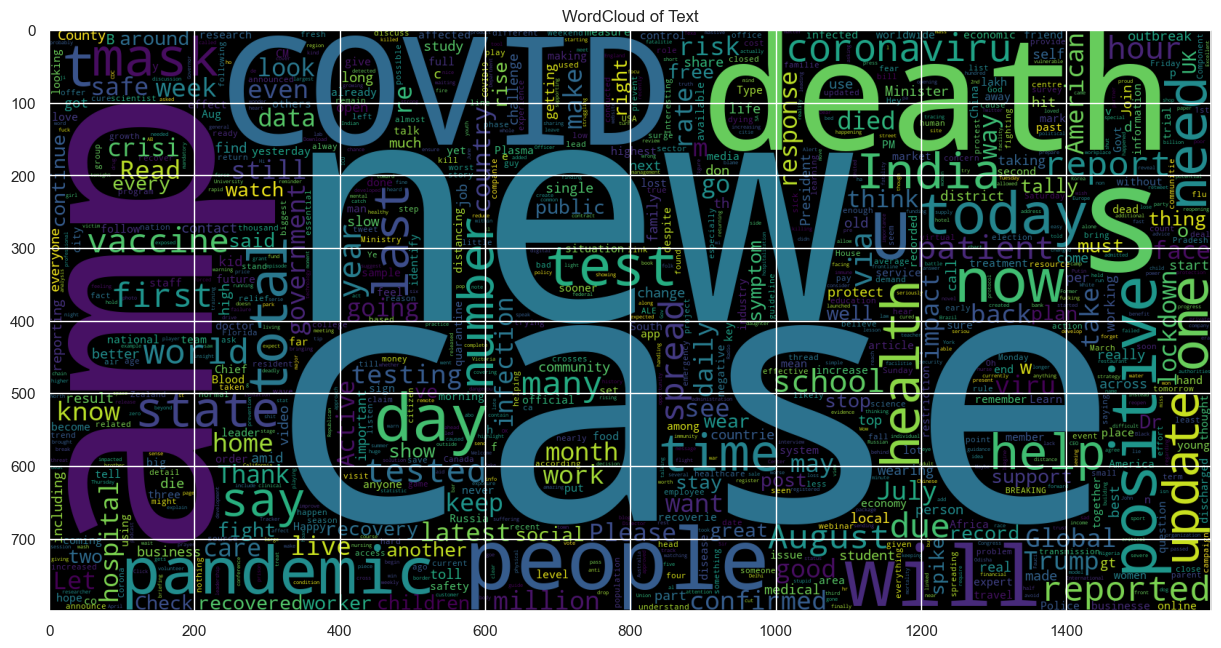

In [13]:
from wordcloud import WordCloud

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
                            collocations=False).generate(" ".join(tweet_df[tweet_df.text.isna()==False].text))

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.title('WordCloud of Text')
plt.show()

### WordCloud Bio

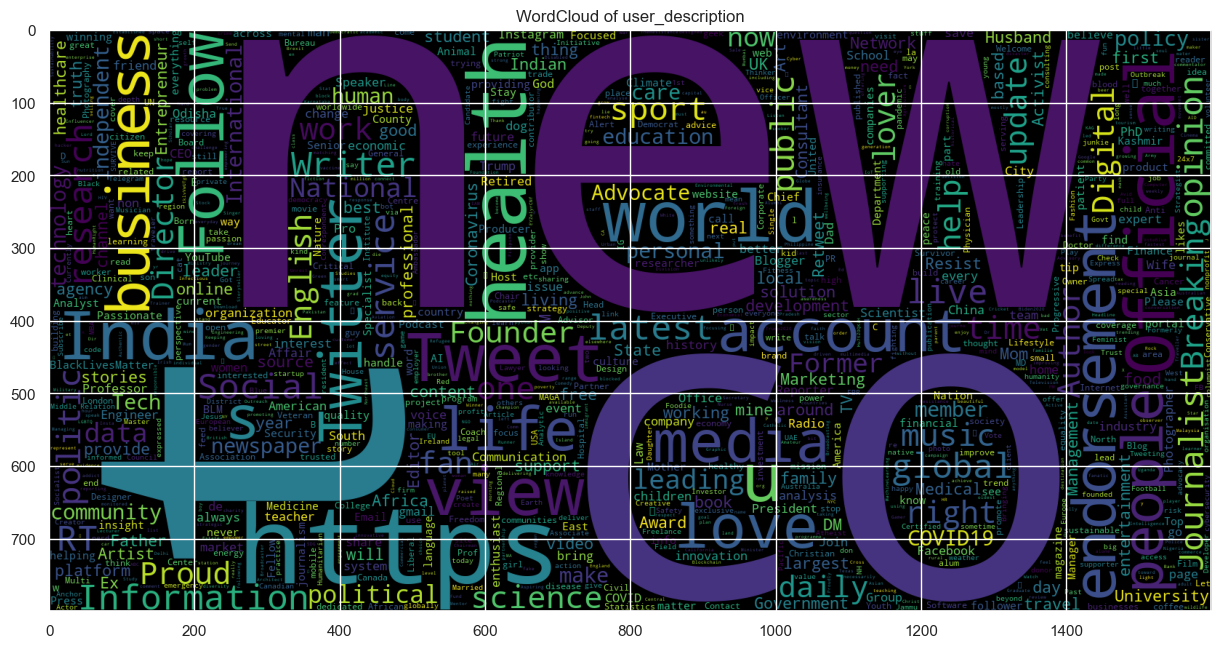

In [14]:
from wordcloud import WordCloud

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
                            collocations=False).generate(" ".join(tweet_df[tweet_df.user_description.isna()==False].user_description))

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.title('WordCloud of user_description')
plt.show()

## EDA Tweet  Data Conclusion
* Number of tweets per day was almost similar across all days.
* Most tweets were made on the morning at 7AM. And second highest at 4PM. It might be that most people tweet as soon as they got out of the bed.
* Many people have tweeted on 25th day of a month.
* Most tweets are made on Saturday. It might be that most people tweet only on weekends?
* It is interesting that most people tweeted from web app and after that Android application.
* From the word cloud of tweets, most repeated words in a tweet are `covid`, `new` and `case`. It is obvious that it was the pandemic time.
* From the word cloud of author's bio, some interesting words highlighted are, `health` and `business`.

## EDA on COVID Data

### Trend of New Cases Per Day

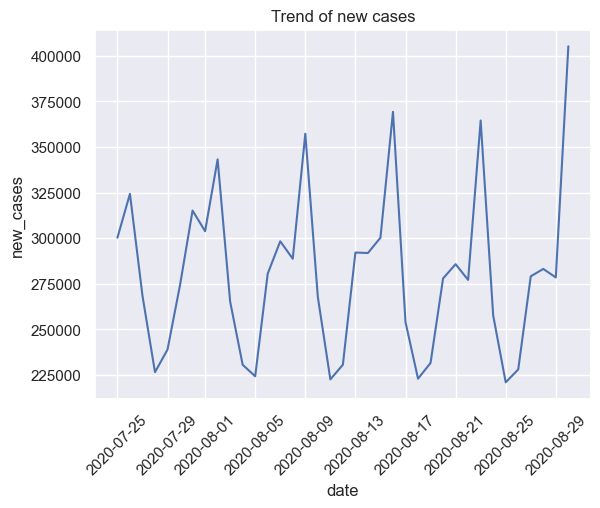

In [57]:
todf = covid_df[~covid_df.location.isin(["Lower middle income", "North America", "World", "Asia", "Europe", 
                           "European Union", "Upper middle income", 
                           "High income", "South America"])]
cworld_df = todf.groupby("date").aggregate(new_cases=("new_cases", "sum"),
                                   new_deaths = ("new_deaths", "sum"),
                                   new_vaccinations = ("new_vaccinations", "sum"),
                                   new_tests = ("new_tests", "sum")
                                   ).reset_index()

cworld_df['date'] = pd.to_datetime(cworld_df['date'])

sns.lineplot(x=cworld_df['date'], y=cworld_df['new_cases'])
plt.xticks(rotation=45)
plt.title('Trend of new cases')
plt.show()

### Trend of New Deaths Per Day

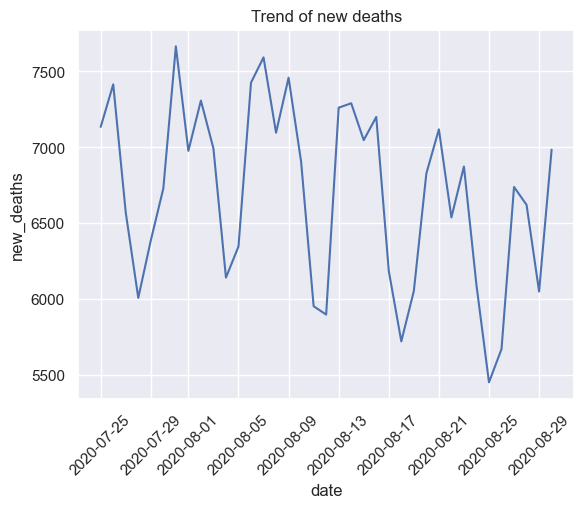

In [58]:

cworld_df['date'] = pd.to_datetime(cworld_df['date'])

sns.lineplot(x=cworld_df['date'], y=cworld_df['new_deaths'])
plt.xticks(rotation=45)
plt.title('Trend of new deaths')
plt.show()

### Trend of New Vaccinations

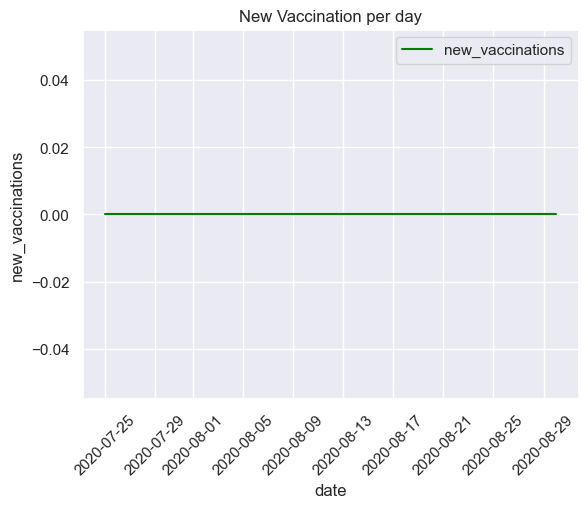

In [59]:
sns.lineplot(x=cworld_df['date'], y=cworld_df['new_vaccinations'], label='new_vaccinations', color='green')
plt.xticks(rotation=45)
plt.title('New Vaccination per day')
plt.show()

### Trend of New Cases vs Deaths

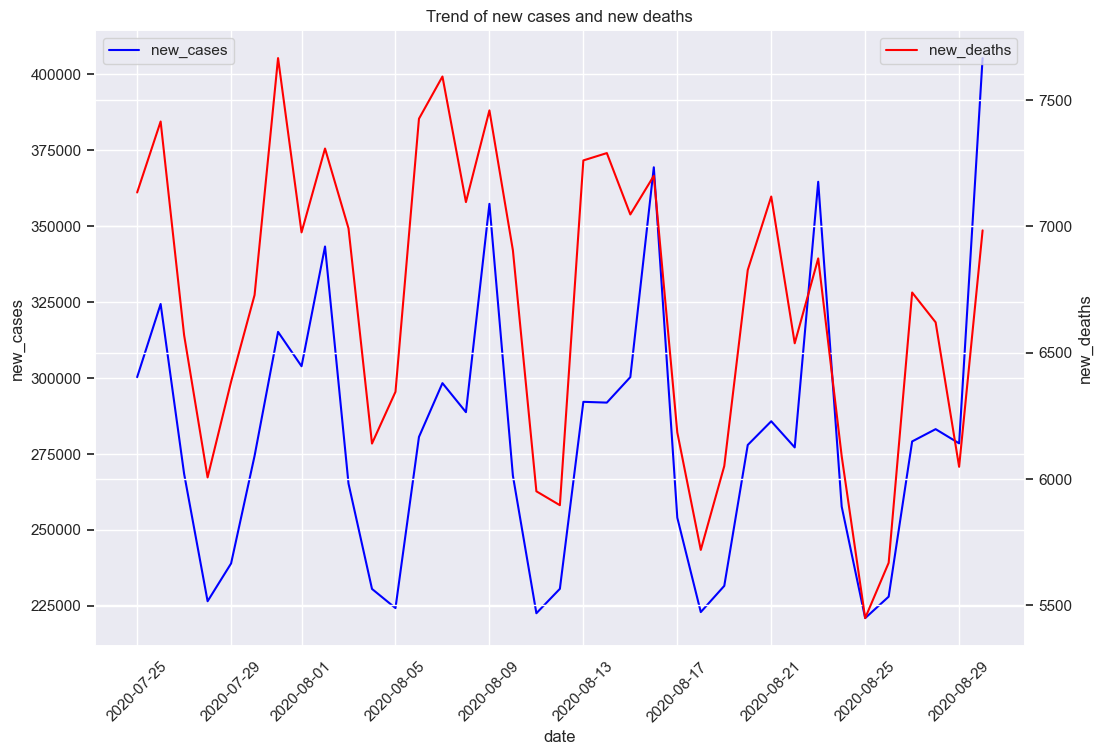

In [60]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=cworld_df['date'], y=cworld_df['new_cases'], label='new_cases', color='blue')
plt.xticks(rotation=45)
tdf = tweet_df.groupby('date_created')['text'].count().reset_index(name='tweet_count')
sns.lineplot(x=cworld_df['date'], y=cworld_df['new_deaths'], label='new_deaths', color='red', ax=ax.axes.twinx())
plt.title('Trend of new cases and new deaths')
plt.show()

### Trend of New Cases Vs New Tests

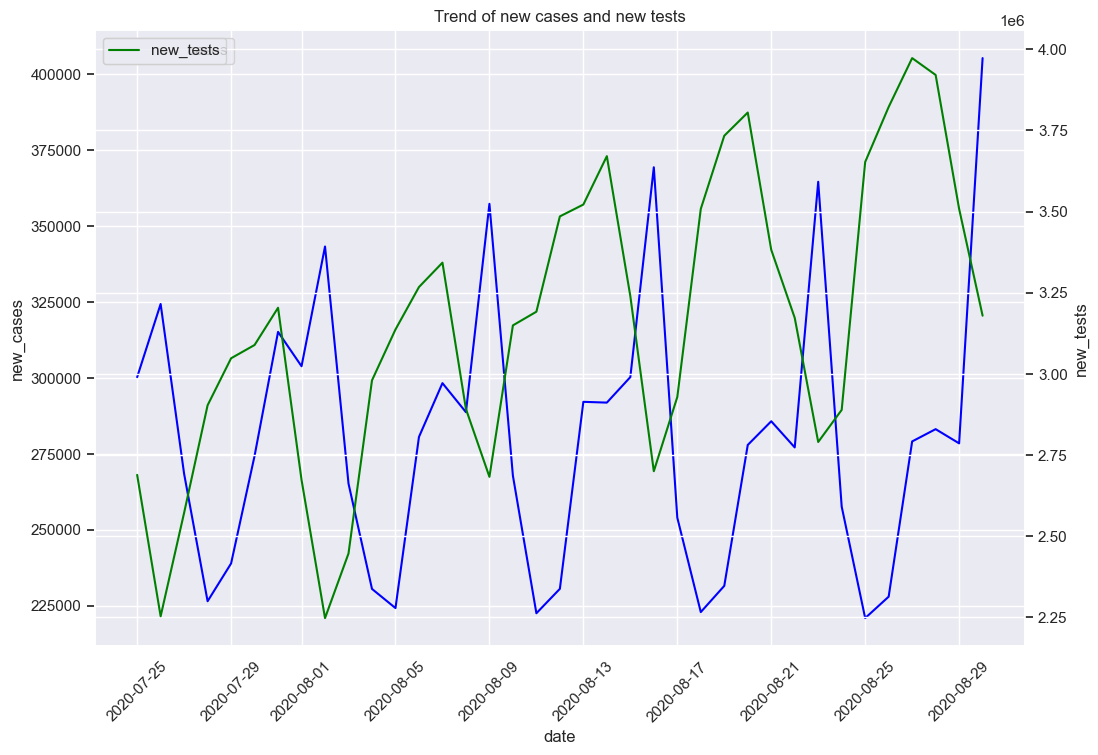

In [61]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=cworld_df['date'], y=cworld_df['new_cases'], label='new_cases', color='blue')
plt.xticks(rotation=45)
sns.lineplot(x=cworld_df['date'], y=cworld_df['new_tests'], label='new_tests', color='green', ax=ax.axes.twinx())
plt.title('Trend of new cases and new tests')
plt.show()

## EDA COVID Data Conclusion
* Looking over the combined plot of new deaths and new cases, we can see that new deaths is following the trend of new cases.
* Looking over the combined plot of new cases and new tests, we can see that they are following quite similar trend.
* Looking over the trend of new vaccinations, there is no record of vaccination in that period of 1 month.

## Compare Trends

### New cases vs number of tweets

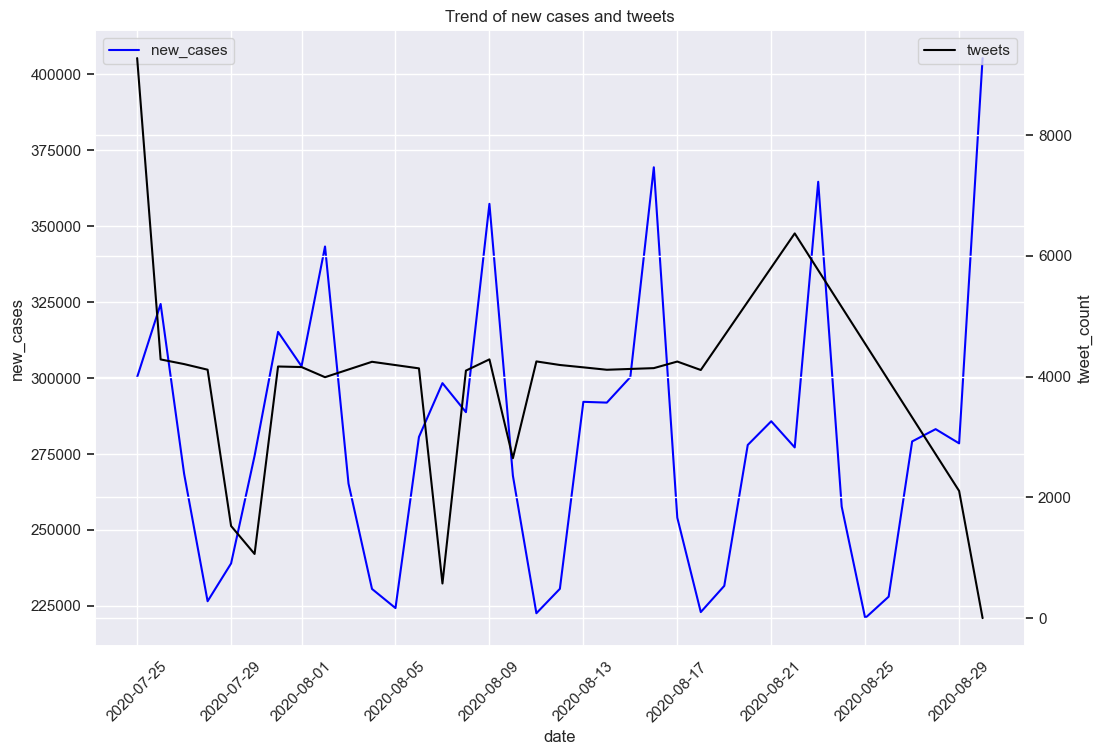

In [62]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=cworld_df['date'], y=cworld_df['new_cases'], label='new_cases', color='blue')
plt.xticks(rotation=45)
tdf = tweet_df.groupby('date_created')['text'].count().reset_index(name='tweet_count')
sns.lineplot(x=tdf['date_created'], y=tdf['tweet_count'], label='tweets', color='black', ax=ax.axes.twinx())
plt.title('Trend of new cases and tweets')
plt.show()

### New Deaths vs Number of Tweets

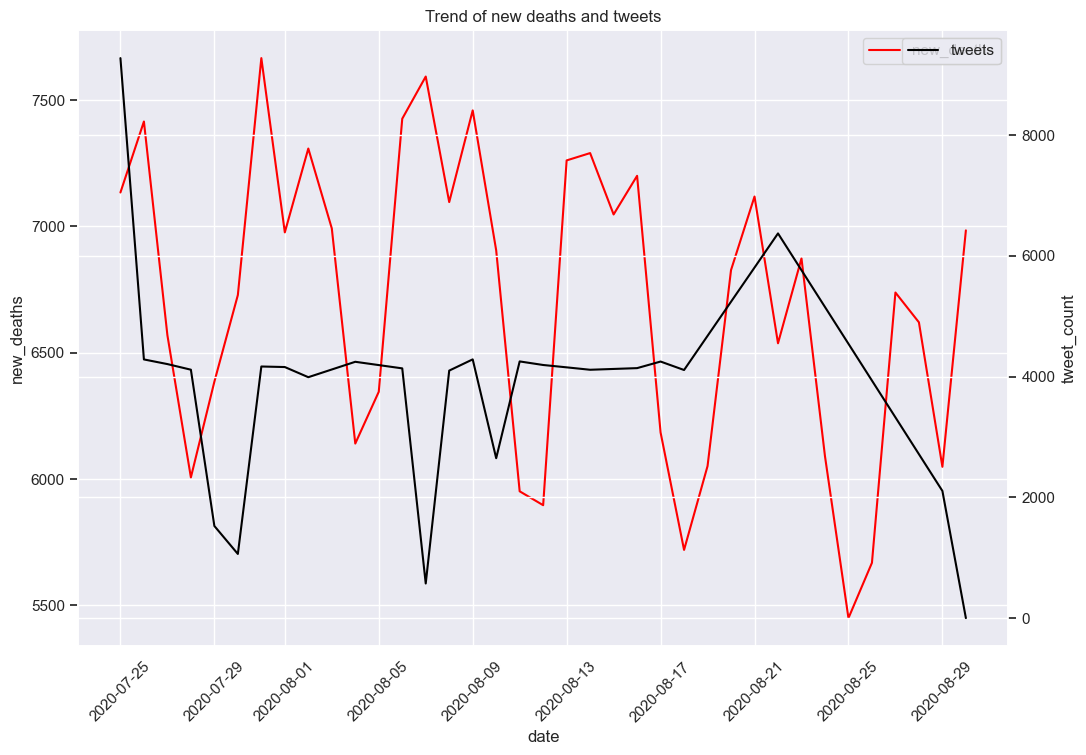

In [63]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=cworld_df['date'], y=cworld_df['new_deaths'], label='new_deaths', color='red')
plt.xticks(rotation=45)
tdf = tweet_df.groupby('date_created')['text'].count().reset_index(name='tweet_count')
sns.lineplot(x=tdf['date_created'], y=tdf['tweet_count'], label='tweets', color='black', ax=ax.axes.twinx())
plt.title('Trend of new deaths and tweets')
plt.show()

### New Tests vs Number of Tweets

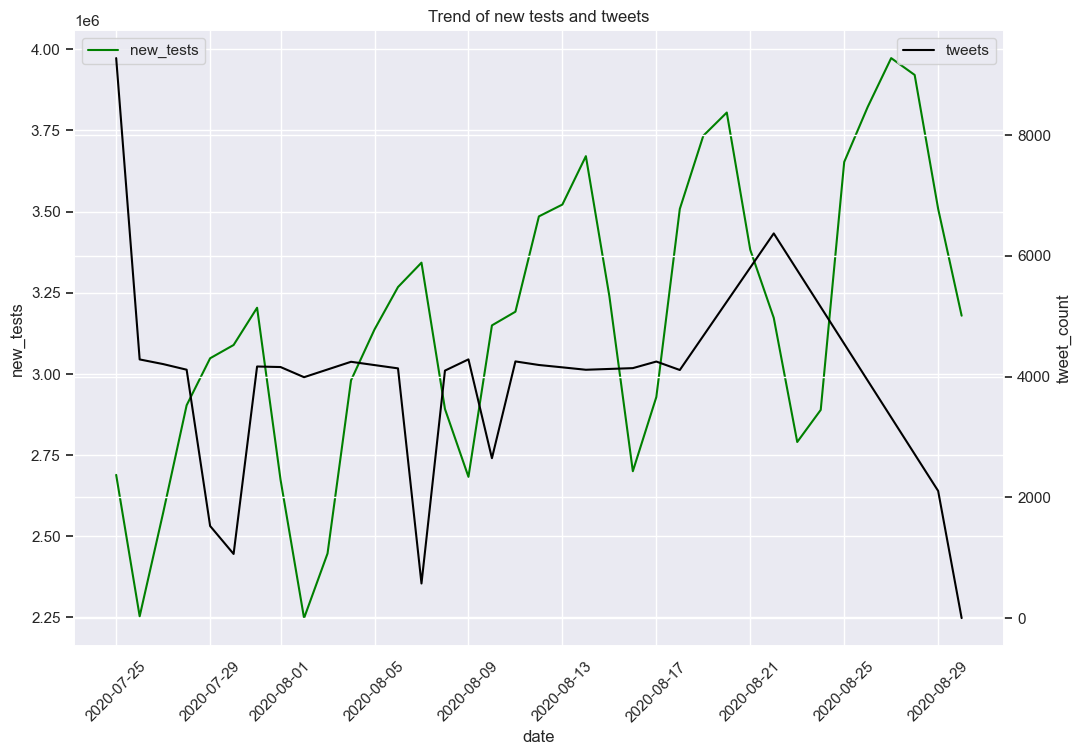

In [64]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=cworld_df['date'], y=cworld_df['new_tests'], label='new_tests', color='green')
plt.xticks(rotation=45)
tdf = tweet_df.groupby('date_created')['text'].count().reset_index(name='tweet_count')
sns.lineplot(x=tdf['date_created'], y=tdf['tweet_count'], label='tweets', color='black', ax=ax.axes.twinx())
plt.title('Trend of new tests and tweets')
plt.show()

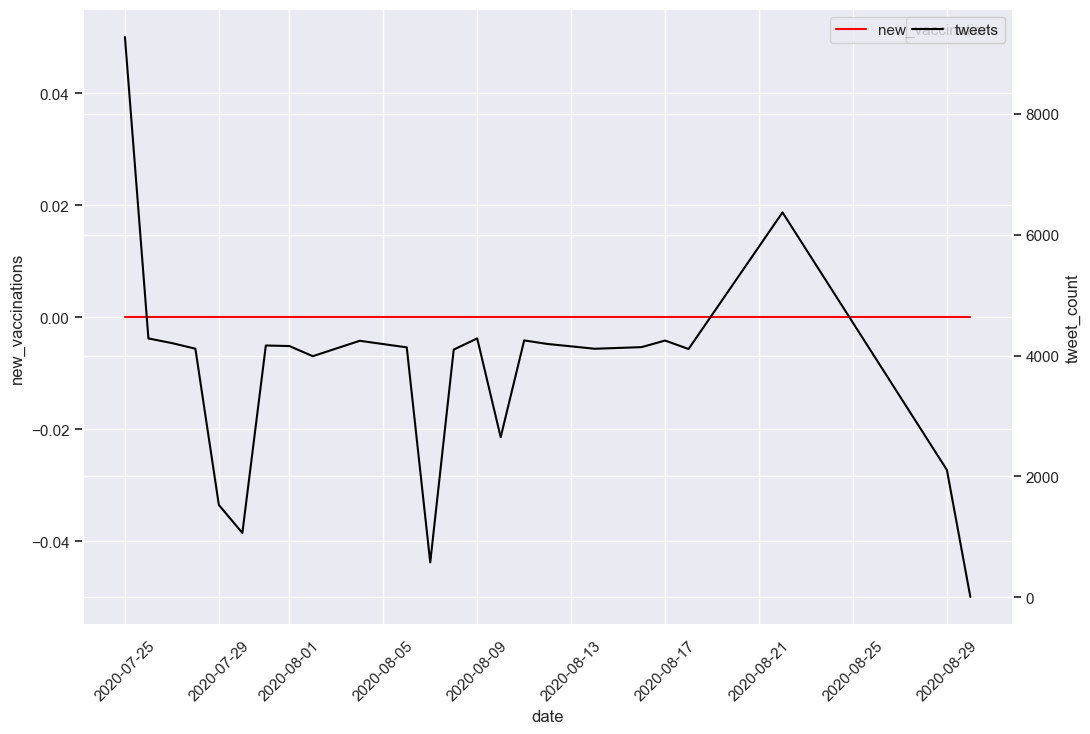

In [20]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x=cworld_df['date'], y=cworld_df['new_vaccinations'], label='new_vaccinations', color='red')
plt.xticks(rotation=45)
tdf = tweet_df.groupby('date_created')['text'].count().reset_index(name='tweet_count')
sns.lineplot(x=tdf['date_created'], y=tdf['tweet_count'], label='tweets', color='black', ax=ax.axes.twinx())
plt.show()

## Conclusion of Compared Trends
* No common trend found of number of tweets per day with new cases, and new deaths but we can see some similarity with new tests. But we need some statistical figure to verify it.

# Assumptions
1. There will be a significant correlation between number of tweets made and at least one field of the covid data.


## 1. There will be a significant correlation between number of tweets made and at least one field of the covid data.
To do so, we can find the correlation.

### Without any shift

In [49]:
tdf['date_created'] = pd.to_datetime(tdf['date_created'])
combined_df = pd.merge(cworld_df, tdf, left_on='date', right_on='date_created', how='inner')


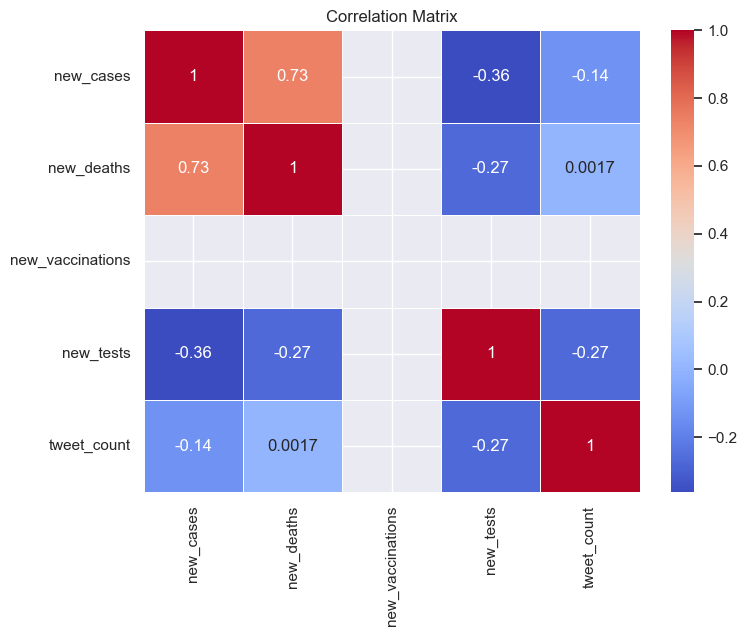

In [47]:
combined_df = combined_df[[c for c in combined_df.columns if 'date' not in c]]
correlation_matrix = combined_df.corr()

# Create a colorful correlation matrix plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Shifting Tweet data 1 day i.e. today's covid_data vs yesterday's tweet counts

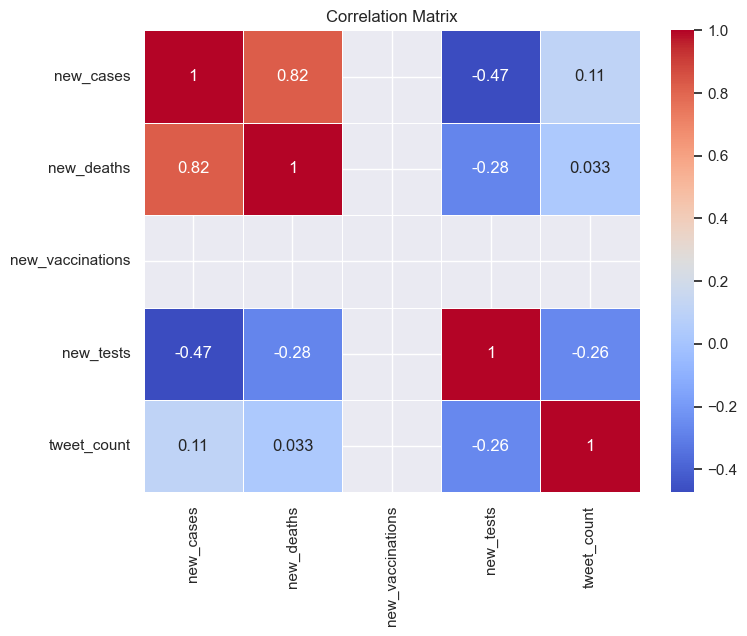

In [53]:
combined_df = pd.merge(cworld_df, tdf.shift(1), left_on='date', right_on='date_created', how='inner')
combined_df = combined_df[[c for c in combined_df.columns if 'date' not in c]]
correlation_matrix = combined_df.corr()

# Create a colorful correlation matrix plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Variable shifts

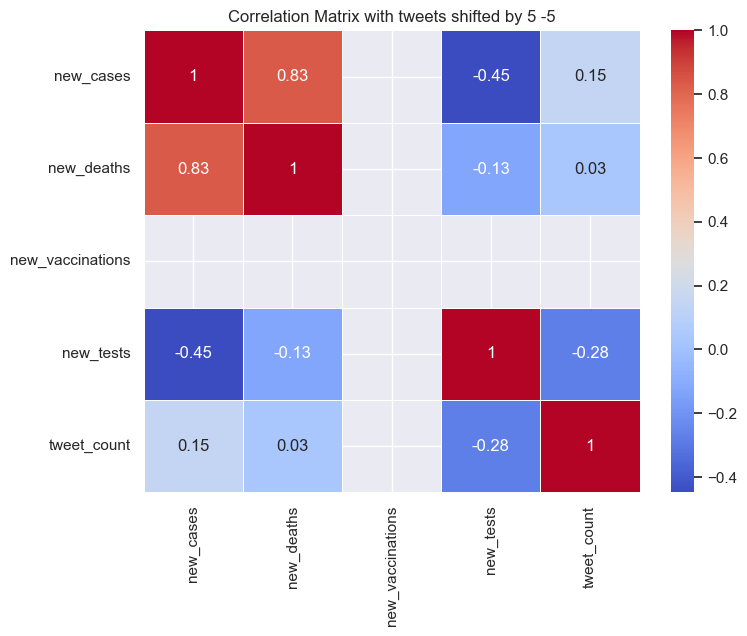

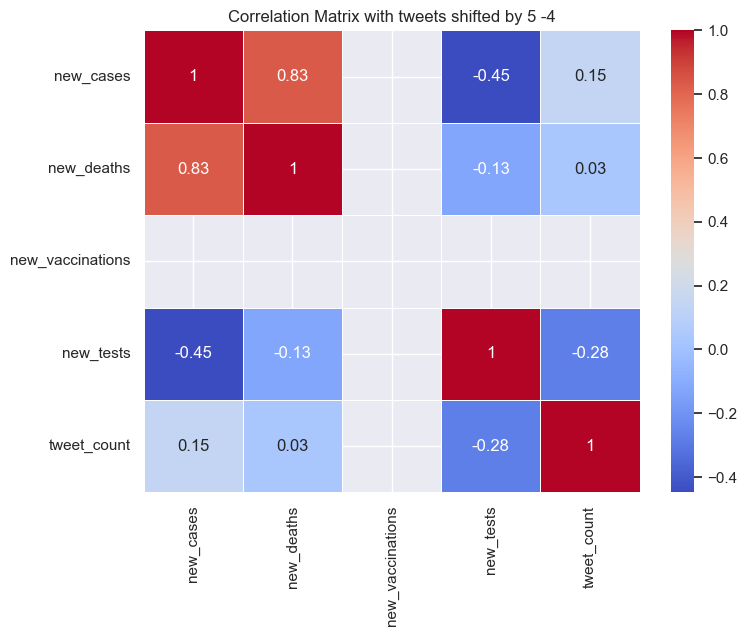

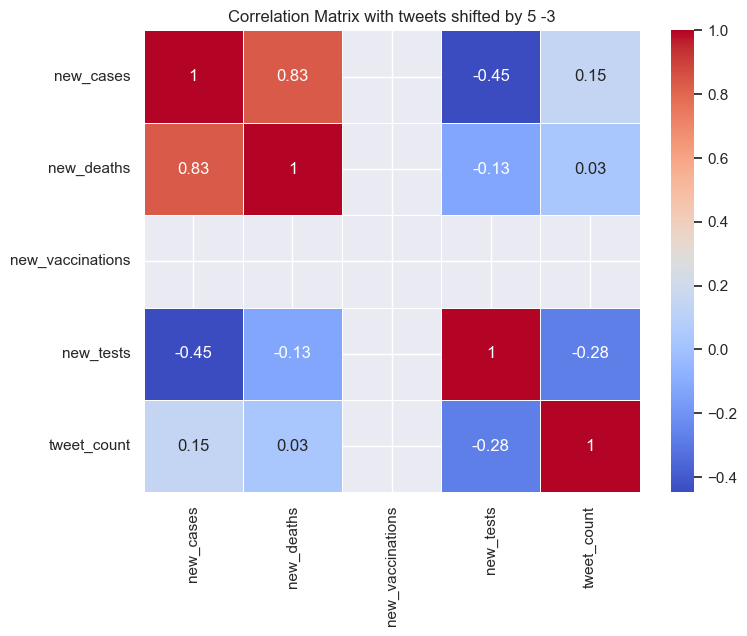

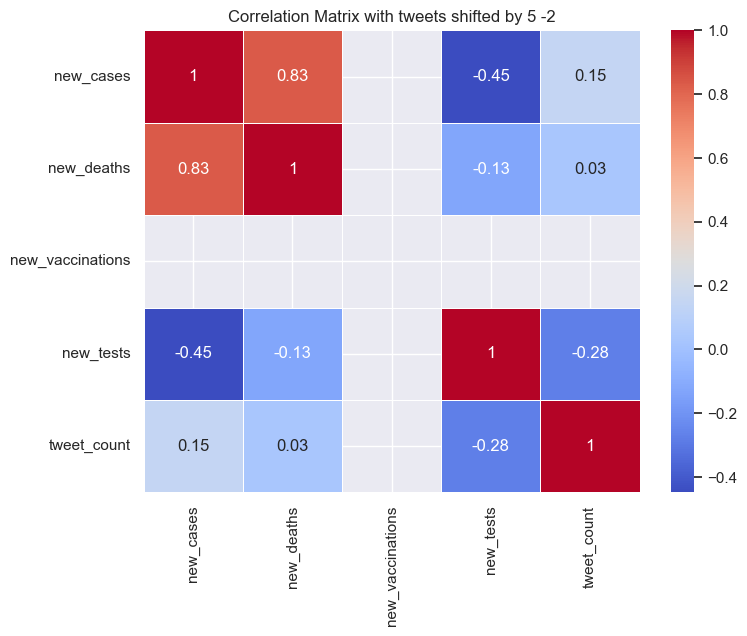

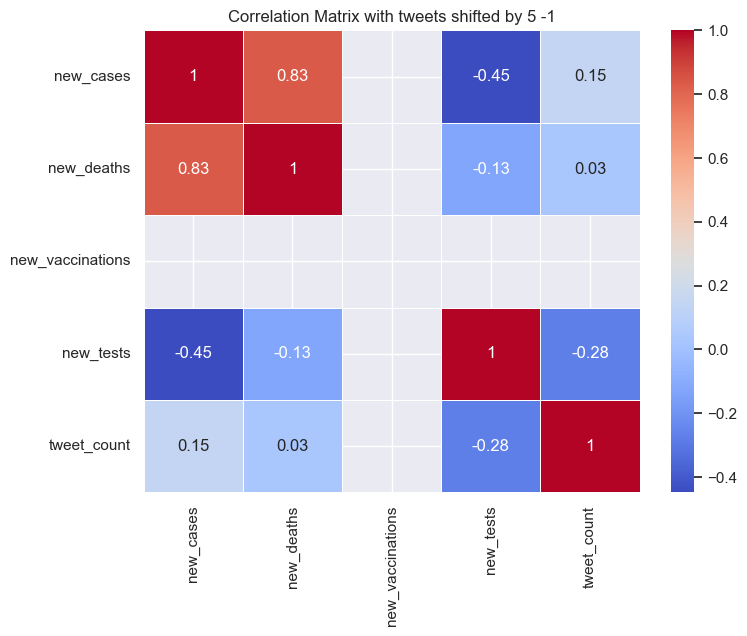

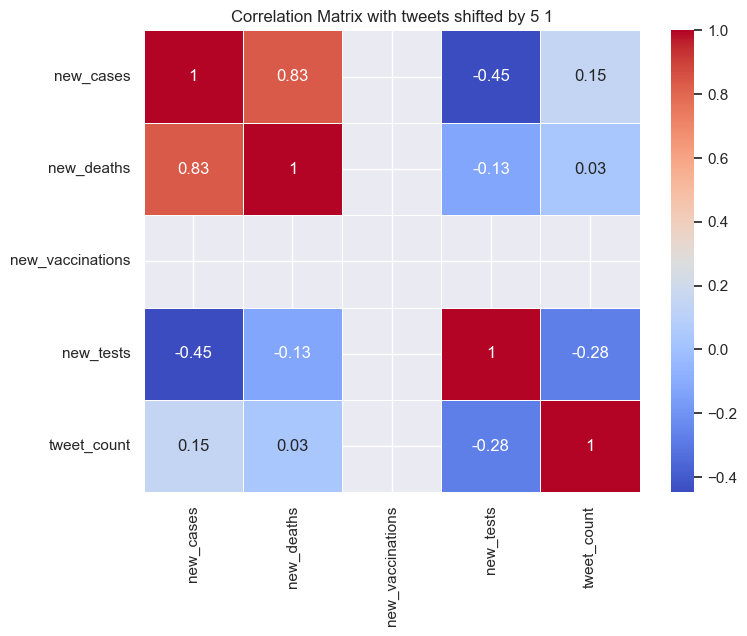

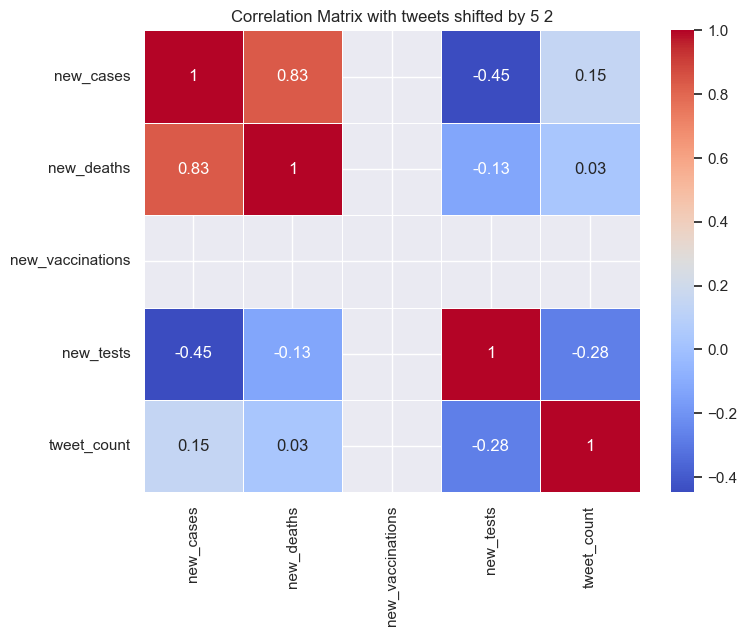

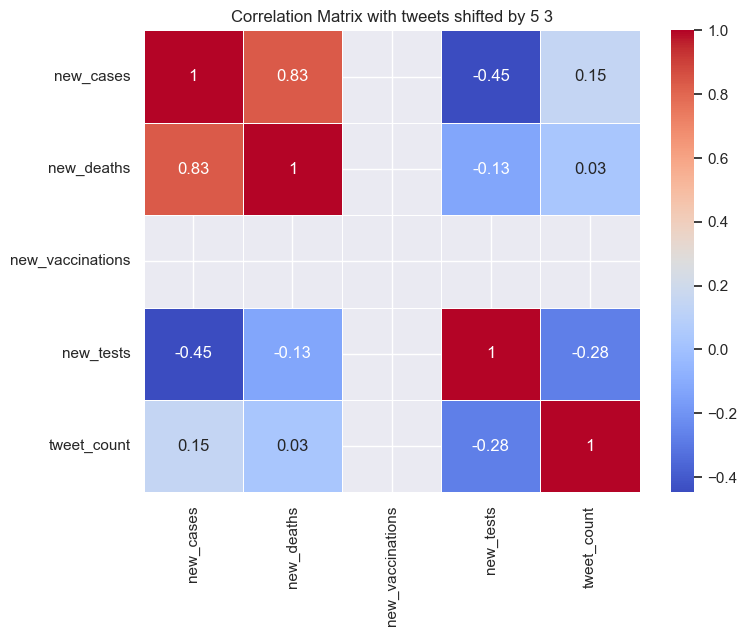

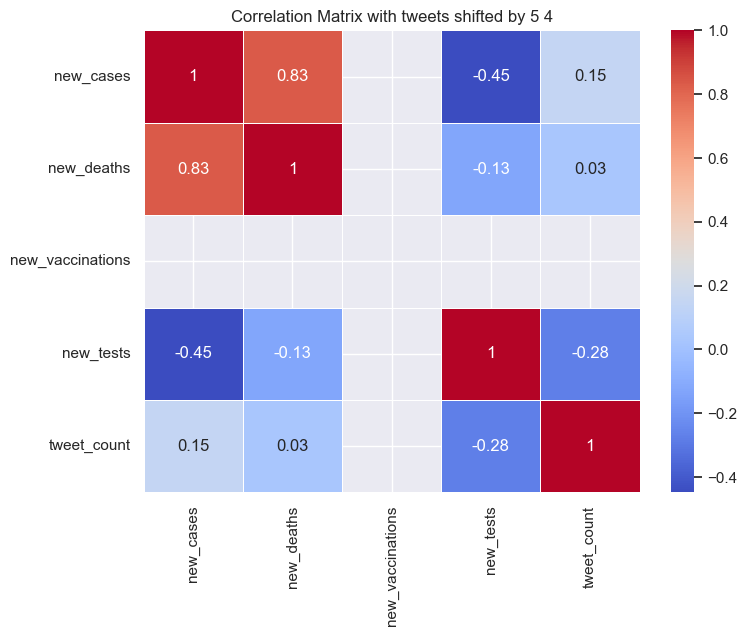

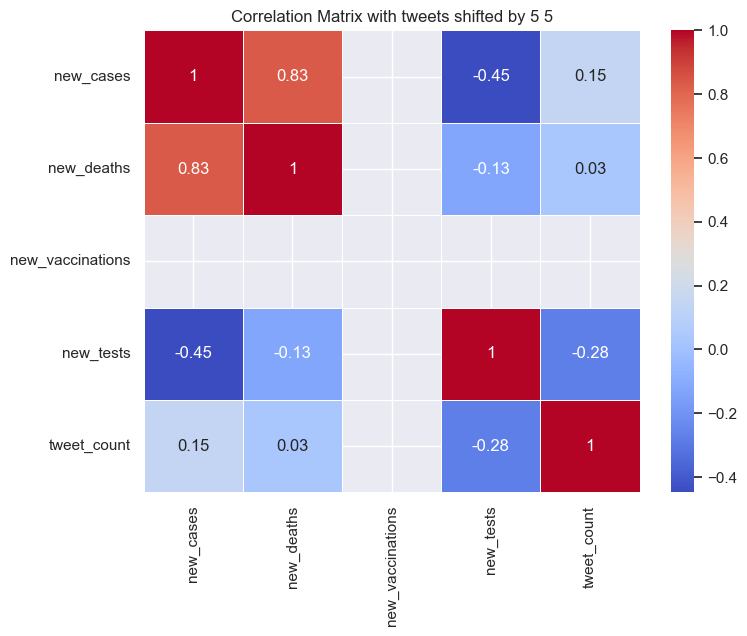

In [56]:
for vs in [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5]:
    combined_df = pd.merge(cworld_df, tdf.shift(5), left_on='date', right_on='date_created', how='inner')
    combined_df = combined_df[[c for c in combined_df.columns if 'date' not in c]]
    correlation_matrix = combined_df.corr()

    # Create a colorful correlation matrix plot using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Matrix with tweets shifted by {vs}')
    plt.show()

### Shifting Tweet data -1 day i.e. yesterday's covid data vs tweet of today

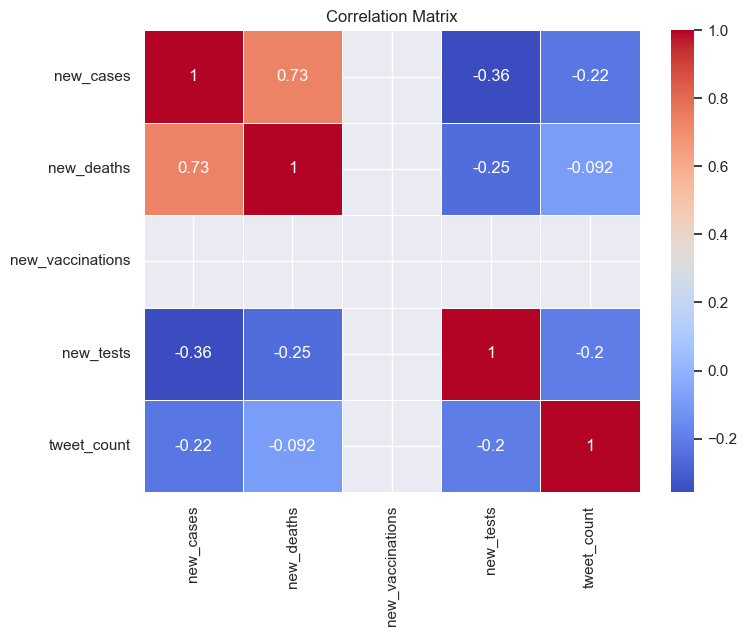

In [50]:
combined_df = pd.merge(cworld_df, tdf.shift(-1), left_on='date', right_on='date_created', how='inner')
combined_df = combined_df[[c for c in combined_df.columns if 'date' not in c]]
correlation_matrix = combined_df.corr()

# Create a colorful correlation matrix plot using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Did assumptions made sense?
1. In the default case i.e. today's tweet vs today's covid data,
    * Tweet count has small negative correlation with new cases. i.e. it might be that people tweeted less after increase in new cases.
    * Tweet count has small negative correlation with new tests. i.e. it might be that people tweeted less after increase in new nests.
2. In the correlation between today's covid_data vs yesterday's tweet counts,
    * Tweet count has positive correlation with new cases. i.e. it might not make any sense that new cases might increase after tweet count increased yesterday.
    * Tweet count has small negative correlation with new tests. i.e. it might be that when people tweeted a lot yesterday, number of people going for testing decreased.

## Conclusion
In overall, the assumptions were not strongly supported by the statistic we found in the data. Hence, we can claim that there is not strong correlation between people tweeting and the cases of covid, tests, and deaths.

The major reason we did not see strong result might be because of lack of enough data of tweets. Currently, this research was done on nearly around month of tweet data only and if we have enough data of tweets, we might be able to see some strong patterns and correlations.